In [1]:
import sys; sys.path.append('../3rdparty/ElasticRods/python')
import elastic_rods, elastic_knots
import numpy as np, matplotlib.pyplot as plt, time, io, os

from helpers import *
from parametric_curves import *
import py_newton_optimizer 

from linkage_vis import LinkageViewer as Viewer, Cente
            // Convert Eigen::SparseMatrix into TripletMatrix; convert dofs from nodes-only to with-thrlineViewer
from tri_mesh_viewer import PointCloudViewer, PointCloudMesh

%load_ext autoreload
%autoreload 2

import parallelism
parallelism.set_max_num_tbb_threads(1)

from MEP import MEP

# Initializing Minimum Energy Path class

In [2]:
start_file = "../data/L400-r0.2-UpTo9Crossings/4_1/0033.obj"
goal_file = "../data/L400-r0.2-UpTo9Crossings/4_1/0001.obj"
mep = MEP(start_file,goal_file)
view = Viewer(mep.getRodList(), width=1024, height=800)
mep.setViewer(view)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.28, children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0),…

# Find a valid path between start and goal

In [4]:
path = mep.unknottingByRandomizing()
path = mep.relaxPathEnd(path)
mep.setPath(path)

0 Dist to Target: 425.01295324406954
100 Dist to Target: 415.5528021396438
200 Dist to Target: 406.1943164242364
300 Dist to Target: 396.8534572143089
400 Dist to Target: 387.6148512782841
500 Dist to Target: 378.49229653959037
600 Dist to Target: 369.4484517152478
700 Dist to Target: 360.5124899427399
800 Dist to Target: 351.6538993992997
900 Dist to Target: 342.87645003487444
1000 Dist to Target: 334.17943966547944
1100 Dist to Target: 325.5653836382325
1200 Dist to Target: 317.0298975922359
1300 Dist to Target: 308.47449764190344
1400 Dist to Target: 300.0301956814658
1500 Dist to Target: 383.36824927618824
1600 Dist to Target: 375.3961766889977
1700 Dist to Target: 368.3168574565728
1800 Dist to Target: 361.7300324061757
1900 Dist to Target: 355.4466383644481
2000 Dist to Target: 349.4198520804208
2100 Dist to Target: 343.6578399883176


KeyboardInterrupt: 

# Optimize the found path

In [5]:
#optimize the calkculated path
path = mep.reducePath(mep.loadPath('Paths/pathAB2.npz'),4)
path_energy = mep.getPathEnergy(path)
optPath = mep.optimizePath(path,iterations=1000,max_step=0.0001)
new_path_energy = mep.getPathEnergy(optPath)

0 totalEnergy = 237567.494869, after 0.01s
  step_size (min/max): 2.00e-05 / 2.10e-05 mean: 2.0945945945945947e-05
  total gradient normalised: 23526.101843267876
100 totalEnergy = 105558.327608, after 1.21s
  step_size (min/max): 2.00e-05 / 1.00e-04 mean: 9.53726863857588e-05
  total gradient normalised: 15593.138447764075
200 totalEnergy = 48397.404089, after 2.42s
  step_size (min/max): 2.00e-05 / 1.00e-04 mean: 9.496953438349872e-05
  total gradient normalised: 9521.767071509843
300 totalEnergy = 26482.400703, after 3.62s
  step_size (min/max): 2.00e-05 / 1.00e-04 mean: 9.567567567567567e-05
  total gradient normalised: 6065.704477296083
400 totalEnergy = 16815.616402, after 4.83s
  step_size (min/max): 2.00e-05 / 1.00e-04 mean: 9.567567567567567e-05
  total gradient normalised: 3963.914701526922
500 totalEnergy = 11585.852382, after 6.04s
  step_size (min/max): 1.00e-08 / 1.00e-04 mean: 9.297324324324322e-05
  total gradient normalised: 2868.343163618402
600 totalEnergy = 8625.723

In [8]:
view = Viewer(mep.getRodList(), width=1024, height=800)
mep.setViewer(view)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.28, children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0),…

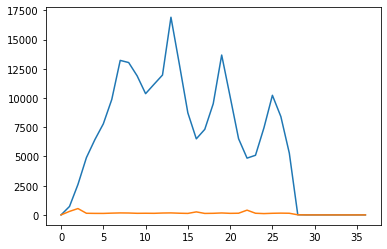

Path old energy: 237575.3505857369, Path new energy: 4955.890235087692
difference:  232619.4603506492


In [9]:
plt.plot(range(len(path_energy)),path_energy)
plt.plot(range(len(new_path_energy)),new_path_energy)
plt.savefig('energy.pdf')
plt.show()
print(f"Path old energy: {sum(path_energy)}, Path new energy: {sum(new_path_energy)}")
print(f"difference:  {sum(path_energy)- sum(new_path_energy)}")
mep.showPath(optPath,wait=0.1)

# Optimizing will take a long time.
### it is much faster to find the saddle points

In [8]:
view = Viewer(mep.getRodList(), width=1024, height=800)
mep.setViewer(view)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.28, children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0),…

In [9]:
#note the relaxing of knots can be inconsistent 
#you have to idetify the saddlepoints by hand
path = mep.reducePath(mep.loadPath('Paths/optimizedpathAB2.npz'),2)
saddlePath = mep.findSaddlePoints(path,28,31)
mep.showPath(saddlePath)

0	198.04	41.7602	41.7602	1	1
1	157.981	23.7867	23.7867	1	1
2	142.144	16.9189	16.9189	1	1
3	130.549	8.27491	8.27491	1	1
4	128.804	7.13277	7.13277	1	1
5	126.487	6.14756	6.14756	1	1
6	125.63	5.78373	5.78373	1	1
7	124.189	5.20653	5.20653	1	1
8	123.611	4.96609	4.96609	1	1
9	122.476	4.54223	4.54223	1	1
10	120.933	3.88214	3.88214	1	1
11	119.711	3.44059	3.44059	1	1
12	118.364	3.24122	3.24122	1	1
13	116.54	3.1262	3.1262	1	1
14	113.875	3.18715	3.18715	1	1
15	109.734	5.10184	5.10184	0.5	1
16	107.1	104.418	104.418	1	1
17	105.88	25.8339	25.8339	1	1
18	105.473	6.98047	6.98047	1	1
19	104.91	3.32329	3.32329	1	1
20	103.813	3.01367	3.01367	1	1
21	101.589	3.28722	3.28722	1	1
22	97.0205	6.58349	6.58349	1	1
23	90.3317	15.9571	15.9571	0.03125	1
24	90.0402	26.5567	26.5567	1	1
25	87.9993	6.24765	6.24765	1	1
26	86.7293	3.23047	3.23047	1	1
27	84.4759	3.32839	3.32839	1	1
28	80.4558	6.19639	6.19639	1	1
29	74.9543	11.3571	11.3571	1	1
30	68.1908	16.1714	16.1714	1	1
31	66.5788	3.55234	3.55234	1	1
32	65.7541	2.55863	

# now optimize the new path

In [10]:
path = mep.loadPath('Paths/ASaddleBpath.npz')
path = mep.reducePath(path,4)
path_energy = mep.getPathEnergy(path)
optPath = mep.optimizePath(path,iterations=1000,max_step=0.001)
new_path_energy = mep.getPathEnergy(optPath)

0 totalEnergy = 1706.864868, after 0.01s
  step_size (min/max): 2.00e-05 / 2.10e-05 mean: 2.0923076923076927e-05
  total gradient normalised: 4428.458842489523
100 totalEnergy = 1168.390017, after 0.82s
  step_size (min/max): 2.00e-05 / 1.00e-03 mean: 0.0008976226458962415
  total gradient normalised: 257.3356294207331
200 totalEnergy = 927.073882, after 1.61s
  step_size (min/max): 2.00e-05 / 1.00e-03 mean: 0.0009037384305390062
  total gradient normalised: 213.204419878225
300 totalEnergy = 766.207850, after 2.40s
  step_size (min/max): 2.00e-05 / 1.00e-03 mean: 0.000913115482501525
  total gradient normalised: 185.80266616982405
400 totalEnergy = 652.755599, after 3.18s
  step_size (min/max): 2.00e-05 / 1.00e-03 mean: 0.0008955277780913407
  total gradient normalised: 154.53227269756587
500 totalEnergy = 569.751860, after 3.96s
  step_size (min/max): 2.00e-05 / 1.00e-03 mean: 0.0009000764810960862
  total gradient normalised: 130.68225389833069
600 totalEnergy = 507.640045, after 4.

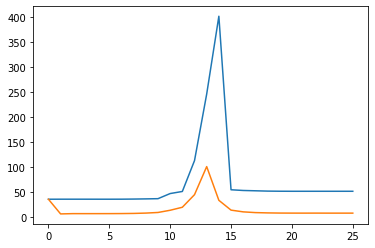

Path old energy: 1794.4975341542524, Path new energy: 417.00753306065155
difference:  1377.4900010936008


In [11]:
plt.plot(range(len(path_energy)),path_energy)
plt.plot(range(len(new_path_energy)),new_path_energy)
plt.savefig('energy.pdf')
plt.show()
print(f"Path old energy: {sum(path_energy)}, Path new energy: {sum(new_path_energy)}")
print(f"difference:  {sum(path_energy)- sum(new_path_energy)}")

# After 1,000,000 iterations
### and path shortening

In [3]:
mep = MEP(start_file,goal_file)
path = mep.loadPath('Paths/ASaddleBpath.npz')
optPath = mep.loadPath('Paths/optimizedoptimizedoptimizedshortendASaddleBpath.npz')
path = mep.reducePath(path,5)
optPath  = optPath

view = Viewer(mep.getRodList(), width=1024, height=800)
mep.setViewer(view)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.28, children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0),…

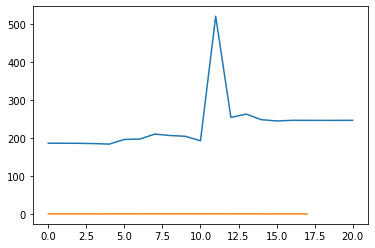

Path old energy: 4907.960333211483, Path new energy: 16.02533512340988
difference:  4891.934998088073


In [4]:
path_energy = mep.getPathEnergy(path)
new_path_energy = mep.getPathEnergy(optPath)
plt.plot(range(len(path_energy)),path_energy)
plt.plot(range(len(new_path_energy)),new_path_energy)
plt.savefig('energy.pdf')
plt.show()
print(f"Path old energy: {sum(path_energy)}, Path new energy: {sum(new_path_energy)}")
print(f"difference:  {sum(path_energy)- sum(new_path_energy)}")

In [5]:
mep.showPath(optPath,wait= 0.5)